In [24]:
import numpy as numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay, classification_report

df=pd.read_csv('C:/Users/asnav/Desktop/MachineLearning/datasets/lung_cancer.csv')
df

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [25]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [26]:
df.tail()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
54,Ernest,Borgnine,26,13,6,1,0
55,Alec,Guinness,77,20,5,4,1
56,Charlton,Heston,75,15,3,5,1
57,Gregory,Peck,43,30,3,8,1
58,Sidney,Poitier,51,25,9,0,0


In [27]:
df.shape

(59, 7)

In [28]:
df.dtypes

Name       object
Surname    object
Age         int64
Smokes      int64
AreaQ       int64
Alkhol      int64
Result      int64
dtype: object

In [29]:
df.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [30]:
df.isna().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [31]:
df.drop(['Name','Surname'],axis=1,inplace=True)
df

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1
5,34,0,10,0,0
6,58,15,10,0,0
7,22,12,5,2,0
8,45,2,6,0,0
9,52,18,4,5,1


In [32]:
x=df.iloc[:,:-1].values
x

array([[35,  3,  5,  4],
       [27, 20,  2,  5],
       [30,  0,  5,  2],
       [28,  0,  8,  1],
       [68,  4,  5,  6],
       [34,  0, 10,  0],
       [58, 15, 10,  0],
       [22, 12,  5,  2],
       [45,  2,  6,  0],
       [52, 18,  4,  5],
       [33,  4,  8,  0],
       [18, 10,  6,  3],
       [25,  2,  5,  1],
       [28, 20,  2,  8],
       [34, 25,  4,  8],
       [39, 18,  8,  1],
       [42, 22,  3,  5],
       [19, 12,  8,  0],
       [62,  5,  4,  3],
       [73, 10,  7,  6],
       [55, 15,  1,  3],
       [33,  8,  8,  1],
       [22, 20,  6,  2],
       [44,  5,  8,  1],
       [77,  3,  2,  6],
       [21, 20,  5,  3],
       [37, 15,  6,  2],
       [34, 12,  8,  0],
       [55, 20,  1,  4],
       [40, 20,  2,  7],
       [36, 13,  5,  2],
       [56, 20,  3,  3],
       [47, 15,  1,  8],
       [62, 25,  3,  4],
       [26, 10,  7,  2],
       [25, 20,  8,  2],
       [59, 20,  3,  4],
       [62, 15,  5,  5],
       [33, 25,  8,  2],
       [37, 10,  5,  3],


In [33]:
y=df.iloc[:,-1].values
y

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train

array([[34, 25,  4,  8],
       [47, 15,  1,  8],
       [62, 20,  5,  6],
       [40, 20,  2,  7],
       [62, 15,  5,  5],
       [75, 15,  3,  5],
       [62,  5,  4,  3],
       [77, 20,  5,  4],
       [34, 12,  8,  0],
       [39, 18,  8,  1],
       [34,  0, 10,  0],
       [56, 20,  3,  3],
       [42, 22,  3,  5],
       [42, 12,  6,  2],
       [55, 15,  1,  3],
       [44, 30,  1,  6],
       [45,  2,  6,  0],
       [28, 20,  2,  8],
       [21, 20,  5,  3],
       [19, 12,  8,  0],
       [51, 25,  9,  0],
       [43, 30,  3,  8],
       [26, 34,  1,  8],
       [33, 25,  8,  2],
       [27, 20,  2,  5],
       [25,  2,  5,  1],
       [21, 20,  8,  3],
       [77,  3,  2,  6],
       [58, 15, 10,  0],
       [44,  5,  8,  1],
       [59, 20,  3,  4],
       [33,  8,  8,  1],
       [73, 10,  7,  6],
       [52, 18,  4,  5],
       [37, 10,  5,  3],
       [26, 13,  6,  1],
       [28,  0,  8,  1],
       [35,  3,  5,  4],
       [35, 20,  5,  1],
       [28, 10,  4,  1],


In [35]:
x_test

array([[37, 15,  6,  2],
       [25, 20,  8,  2],
       [63, 20,  4,  5],
       [55, 20,  1,  4],
       [18, 10,  6,  3],
       [30,  0,  5,  2],
       [26, 10,  7,  2],
       [31, 20,  9,  4],
       [50, 20,  2,  4],
       [22, 20,  6,  2],
       [68,  4,  5,  6],
       [33,  4,  8,  0],
       [36, 13,  5,  2],
       [47, 12,  8,  0],
       [62, 25,  3,  4],
       [69, 20,  5,  4],
       [53, 20,  6,  3],
       [22, 12,  5,  2]])

In [36]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [37]:
y_test

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [38]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.5753424 ,  1.17164345, -0.41605821,  1.74855353],
       [ 0.24459744, -0.02629624, -1.57913003,  1.74855353],
       [ 1.19068187,  0.57267361, -0.02836761,  0.98588656],
       [-0.19690863,  0.57267361, -1.19143942,  1.36722005],
       [ 1.19068187, -0.02629624, -0.02836761,  0.60455308],
       [ 2.01062171, -0.02629624, -0.80374882,  0.60455308],
       [ 1.19068187, -1.22423593, -0.41605821, -0.15811388],
       [ 2.1367663 ,  0.57267361, -0.02836761,  0.2232196 ],
       [-0.5753424 , -0.38567814,  1.13470421, -1.30211433],
       [-0.25998093,  0.33308567,  1.13470421, -0.92078085],
       [-0.5753424 , -1.82320577,  1.91008542, -1.30211433],
       [ 0.8122481 ,  0.57267361, -0.80374882, -0.15811388],
       [-0.07076404,  0.81226155, -0.80374882,  0.60455308],
       [-0.07076404, -0.38567814,  0.359323  , -0.53944737],
       [ 0.7491758 , -0.02629624, -1.57913003, -0.15811388],
       [ 0.05538055,  1.7706133 , -1.57913003,  0.98588656],
       [ 0.11845285, -1.

In [39]:
x_test

array([[-0.38612552, -0.02629624,  0.359323  , -0.53944737],
       [-1.14299306,  0.57267361,  1.13470421, -0.53944737],
       [ 1.25375417,  0.57267361, -0.41605821,  0.60455308],
       [ 0.7491758 ,  0.57267361, -1.57913003,  0.2232196 ],
       [-1.58449913, -0.62526608,  0.359323  , -0.15811388],
       [-0.82763158, -1.82320577, -0.02836761, -0.53944737],
       [-1.07992077, -0.62526608,  0.74701361, -0.53944737],
       [-0.76455929,  0.57267361,  1.52239482,  0.2232196 ],
       [ 0.43381432,  0.57267361, -1.19143942,  0.2232196 ],
       [-1.33220995,  0.57267361,  0.359323  , -0.53944737],
       [ 1.56911564, -1.3440299 , -0.02836761,  0.98588656],
       [-0.6384147 , -1.3440299 ,  1.13470421, -1.30211433],
       [-0.44919781, -0.26588418, -0.02836761, -0.53944737],
       [ 0.24459744, -0.38567814,  1.13470421, -1.30211433],
       [ 1.19068187,  1.17164345, -0.80374882,  0.2232196 ],
       [ 1.63218794,  0.57267361, -0.02836761,  0.2232196 ],
       [ 0.62303121,  0.

In [40]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [41]:
y_test

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [42]:
print(model.predict(scaler.transform([[37, 15,  6,  2]])))

[0]


In [43]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0],
       [ 0,  7]])

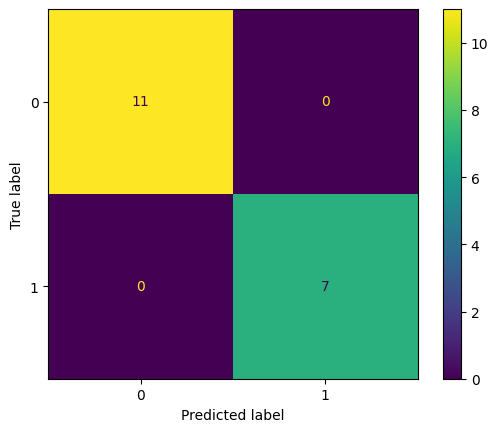

In [44]:
labels=[0, 1]
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

In [45]:
score=accuracy_score(y_test,y_pred)
score

1.0

In [46]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

